In [76]:
"""
Importação das bibliotecas
"""
#Para trabalhar com dados:
import pandas as pd
#Para matrizes
import numpy as np
#Para gráficos:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from matplotlib.font_manager import FontProperties
#Normalização do dados:
from sklearn.preprocessing import MinMaxScaler

In [77]:
"""
Importação dos dados
"""
Dados_Hang_Seng = pd.read_csv("/content/Hang Seng Historical Data.csv")
Dados_SEP_500 = pd.read_csv("/content/S&P 500 Historical Data.csv")

In [78]:
#Mostrar os dados - Dados Hang Seng
Dados_Hang_Seng.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/28/2025,"23,426.60","23,672.82","23,775.30","23,254.30",3.54B,-0.65%
1,03/27/2025,"23,578.80","23,543.86","23,865.62","23,372.36",3.79B,0.41%
2,03/26/2025,"23,483.32","23,460.31","23,596.85","23,350.73",3.12B,0.60%
3,03/25/2025,"23,344.25","23,643.32","23,747.32","23,321.67",4.23B,-2.35%
4,03/24/2025,"23,905.56","23,749.58","23,967.51","23,531.20",3.39B,0.91%


In [79]:
#Mostrar os dados - Dados S&P 500
Dados_SEP_500.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/21/2025,"5,667.56","5,630.73","5,670.84","5,603.10",NaN,0.08%
1,03/20/2025,"5,662.89","5,646.92","5,711.15","5,632.33",NaN,-0.22%
2,03/19/2025,"5,675.29","5,632.37","5,715.33","5,622.20",NaN,1.08%
3,03/18/2025,"5,614.66","5,654.53","5,654.53","5,597.76",NaN,-1.07%
4,03/17/2025,"5,675.12","5,635.60","5,703.52","5,631.12",NaN,0.64%


In [80]:
"""
Vamos transformar as colunas de datas para o formato datetime
"""
Dados_Hang_Seng["Date"] = pd.to_datetime(Dados_Hang_Seng["Date"])
Dados_SEP_500["Date"] = pd.to_datetime(Dados_SEP_500["Date"])

In [81]:
Dados_Hang_Seng.dtypes

,0
Date,datetime64[ns]
Price,object
Open,object
High,object
Low,object
Vol.,object
Change %,object


In [82]:
"""
Agora, vamos tirar a vírgula e transformar a coluna de preço em float
"""
Dados_Hang_Seng["Price"] = Dados_Hang_Seng["Price"].str.replace(",","")
Dados_Hang_Seng["Price"] = Dados_Hang_Seng["Price"].astype(float)
Dados_SEP_500["Price"] = Dados_SEP_500["Price"].str.replace(",","")
Dados_SEP_500["Price"] = Dados_SEP_500["Price"].astype(float)

In [83]:
"""
Vamos normalizar os dados para compará-los
"""
Norm = MinMaxScaler()
Dados_Hang_Seng["Price"] = Dados_Hang_Seng["Price"].values.reshape(-1, 1)
Dados_Hang_Seng["Price"] = Norm.fit_transform(Dados_Hang_Seng[["Price"]])
Dados_SEP_500["Price"] = Dados_SEP_500["Price"].values.reshape(-1, 1)
Dados_SEP_500["Price"] = Norm.fit_transform(Dados_SEP_500[["Price"]])

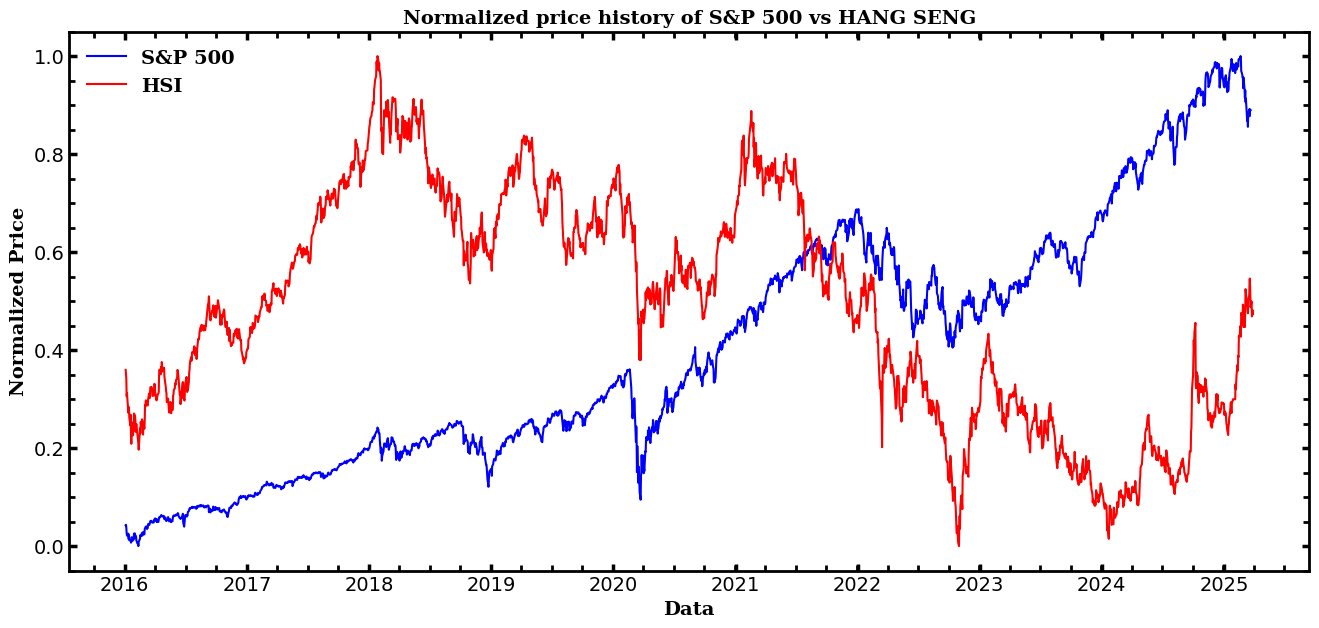

In [84]:
from typing_extensions import dataclass_transform
"""
Criação da primeira fonte de texto para colocar como fonte dos labels
"""
font1 = {"family": "serif", "weight": "bold", "color": "black", "size": 14}
"""
Criação da segunda fonte de texto para colocar como fonte da legenda
"""
font2 = FontProperties(family = "serif",
                       weight = "bold",
                       size = 14)
"""
Cria um "lugar" com size (9, 7) para alocar a figura
"""
fig, axs = plt.subplots(figsize = (16, 7))
"""
Plota um scatter entre o total de casos (cumulativo) e total de mortes (cumulativo)
"""
axs.plot(Dados_SEP_500["Date"], Dados_SEP_500["Price"], color = "blue")
axs.plot(Dados_Hang_Seng["Date"], Dados_Hang_Seng["Price"], color = "red")
axs.grid(False)
"""
Definindo a "grossura" e a cor do eixos
"""
for axis in ["left", "right", "top", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("black")
"""
Trabalha com os ticks do gráfico
"""
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "black", labelsize = 14, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "major", direction = "in", color = "black", length = 5.4, width = 2.5, left = True, bottom = True, top = True, right = True)
axs.tick_params(which = "minor", direction = "in", color = "black", length=4, width = 2, left = True, bottom = True, top = True, right = True)
"""
Descrição para cada eixo
"""
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Normalized Price", fontdict = font1)
"""
plt.rcParams["axes.labelweight"] = "bold" mostra em negrito os números nos eixos.
"""
plt.rcParams["axes.labelweight"] = "bold"
"""
Definindo um fundo branco para a imagem
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
"""
Título
"""
plt.title("Normalized price history of S&P 500 vs HANG SENG", fontdict=font1)
"""
Mostrar o gráfico
"""
"""
Legenda
"""
plt.legend(["S&P 500", "HSI"], prop = font2, frameon=False)
"""
Mostrar o gráfico
"""
plt.show()

In [85]:
"""
Vamos dar uma olhada na correlação entre os dados
"""
correlacoes = pd.concat([Dados_Hang_Seng[["Price"]], Dados_SEP_500[["Price"]]], axis =1)
correlacoes.columns = ["HSI", "SEP500"]
correlacao = correlacoes["HSI"].corr(correlacoes["SEP500"])
print(f"A correlação entre o S&P 500 e o Hang Seng (HSI) é {round(correlacao, 2)}.")

A correlação entre o S&P 500 e o Hang Seng (HSI) é -0.48.
